# IMDB Movie Data Analysis
**By Sakib Chughtai**

**Prompt: This dataset contains information about movies. For a movie to be commercial success, it depends on various factors like director, actors, critic reviews and viewers reaction.**
**You will need to understand the dataset, perform some EDA and modelling on the dataset provided, and finally present your finding at the interview.**

# Data Preparation

In [1]:
#Import necessary libraries

import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.options.mode.chained_assignment = None  # default='warn'

In [2]:
#Import excel dataset and instantiate a pandas DataFrame

df = pd.read_excel('IMDB_movies_rating.xlsx')

In [3]:
#Print the number of columns and rows

df.shape

(5043, 28)

In [4]:
#Show first 10 rows of dataset

df.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [5]:
df[1:10]

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0
5,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,...,738.0,English,USA,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000
6,Color,Sam Raimi,392.0,156.0,0.0,4000.0,James Franco,24000.0,336530303.0,Action|Adventure|Romance,...,1902.0,English,USA,PG-13,258000000.0,2007.0,11000.0,6.2,2.35,0
7,Color,Nathan Greno,324.0,100.0,15.0,284.0,Donna Murphy,799.0,200807262.0,Adventure|Animation|Comedy|Family|Fantasy|Musi...,...,387.0,English,USA,PG,260000000.0,2010.0,553.0,7.8,1.85,29000
8,Color,Joss Whedon,635.0,141.0,0.0,19000.0,Robert Downey Jr.,26000.0,458991599.0,Action|Adventure|Sci-Fi,...,1117.0,English,USA,PG-13,250000000.0,2015.0,21000.0,7.5,2.35,118000
9,Color,David Yates,375.0,153.0,282.0,10000.0,Daniel Radcliffe,25000.0,301956980.0,Adventure|Family|Fantasy|Mystery,...,973.0,English,UK,PG,250000000.0,2009.0,11000.0,7.5,2.35,10000


In [6]:
df.describe()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
count,4993.000000,5028.000000,4939.000000,5020.000000,5036.000000,4.159000e+03,5.043000e+03,5043.000000,5030.000000,5022.000000,4.551000e+03,4935.000000,5030.000000,5043.000000,4714.000000,5043.000000
mean,140.194272,107.201074,686.509212,645.009761,6560.047061,4.846841e+07,8.366816e+04,9699.063851,1.371173,272.770808,3.975262e+07,2002.470517,1651.754473,6.442138,2.220403,7525.964505
std,121.601675,25.197441,2813.328607,1665.041728,15020.759120,6.845299e+07,1.384853e+05,18163.799124,2.013576,377.982886,2.061149e+08,12.474599,4042.438863,1.125116,1.385113,19320.445110
min,1.000000,7.000000,0.000000,0.000000,0.000000,1.620000e+02,5.000000e+00,0.000000,0.000000,1.000000,2.180000e+02,1916.000000,0.000000,1.600000,1.180000,0.000000
25%,50.000000,93.000000,7.000000,133.000000,614.000000,5.340988e+06,8.593500e+03,1411.000000,0.000000,65.000000,6.000000e+06,1999.000000,281.000000,5.800000,1.850000,0.000000
50%,110.000000,103.000000,49.000000,371.500000,988.000000,2.551750e+07,3.435900e+04,3090.000000,1.000000,156.000000,2.000000e+07,2005.000000,595.000000,6.600000,2.350000,166.000000
75%,195.000000,118.000000,194.500000,636.000000,11000.000000,6.230944e+07,9.630900e+04,13756.500000,2.000000,326.000000,4.500000e+07,2011.000000,918.000000,7.200000,2.350000,3000.000000
max,813.000000,511.000000,23000.000000,23000.000000,640000.000000,7.605058e+08,1.689764e+06,656730.000000,43.000000,5060.000000,1.221550e+10,2016.000000,137000.000000,9.500000,16.000000,349000.000000


In [7]:
df.dtypes

color                         object
director_name                 object
num_critic_for_reviews       float64
duration                     float64
director_facebook_likes      float64
actor_3_facebook_likes       float64
actor_2_name                  object
actor_1_facebook_likes       float64
gross                        float64
genres                        object
actor_1_name                  object
movie_title                   object
num_voted_users                int64
cast_total_facebook_likes      int64
actor_3_name                  object
facenumber_in_poster         float64
plot_keywords                 object
movie_imdb_link               object
num_user_for_reviews         float64
language                      object
country                       object
content_rating                object
budget                       float64
title_year                   float64
actor_2_facebook_likes       float64
imdb_score                   float64
aspect_ratio                 float64
m

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000208813E8790>,
      dtype=object)

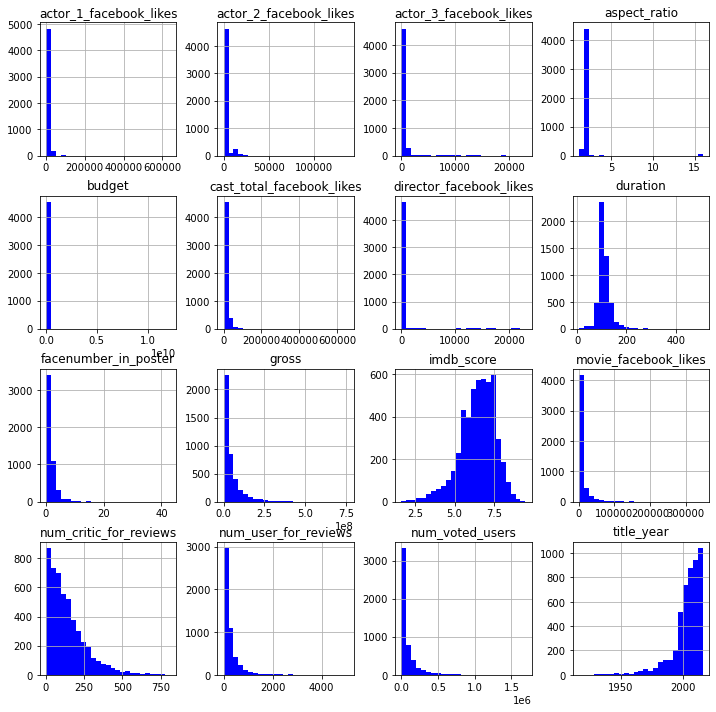

In [8]:
#create a histogram to have a look how the data is skewed

df.hist(bins=25,figsize=(12,12),color='b')

In [9]:
#remove duplicates, apply to original dataset
df.drop_duplicates(inplace=True)

df.shape

(4998, 28)

In [10]:
df.columns

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes'],
      dtype='object')

In [11]:
# remove redundant columns

df.drop(['aspect_ratio','facenumber_in_poster','movie_imdb_link'], axis=1, inplace=True)

In [12]:
df.columns

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'plot_keywords', 'num_user_for_reviews', 'language',
       'country', 'content_rating', 'budget', 'title_year',
       'actor_2_facebook_likes', 'imdb_score', 'movie_facebook_likes'],
      dtype='object')

In [13]:
#Every plotkeywords value is split using a | so we call a split function to remove them
#Use the first plot keyword as main keyword

df['plot_keywords'] = df.plot_keywords.str.split('|').str[0]

In [14]:
#Every genre is split using a | so we call a split function to remove them
#Use first genre as main genre, where str[0] is the first genre

df['genres'] = df.genres.str.split('|').str[0]

In [15]:
df.genres.unique()

array(['Action', 'Documentary', 'Adventure', 'Drama', 'Animation',
       'Comedy', 'Mystery', 'Fantasy', 'Crime', 'Biography', 'Sci-Fi',
       'Horror', 'Romance', 'Thriller', 'Game-Show', 'Family', 'Music',
       'Western', 'Musical', 'Film-Noir', 'History'], dtype=object)

In [16]:
df.columns

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'plot_keywords', 'num_user_for_reviews', 'language',
       'country', 'content_rating', 'budget', 'title_year',
       'actor_2_facebook_likes', 'imdb_score', 'movie_facebook_likes'],
      dtype='object')

In [17]:
df.language.value_counts()

English       4662
French          73
Spanish         40
Hindi           28
Mandarin        24
German          19
Japanese        17
Cantonese       11
Russian         11
Italian         11
Portuguese       8
Korean           8
Swedish          5
Arabic           5
Danish           5
Hebrew           5
Polish           4
Persian          4
Norwegian        4
Dutch            4
Chinese          3
Thai             3
Aboriginal       2
Romanian         2
Zulu             2
Icelandic        2
None             2
Indonesian       2
Dari             2
Dzongkha         1
Urdu             1
Slovenian        1
Mongolian        1
Greek            1
Hungarian        1
Swahili          1
Kazakh           1
Tamil            1
Filipino         1
Maya             1
Telugu           1
Aramaic          1
Panjabi          1
Czech            1
Vietnamese       1
Kannada          1
Bosnian          1
Name: language, dtype: int64

In [18]:
#Majority of movies are in english so we can remove this column

df.drop('language', axis=1, inplace=True)

In order to have as many datapoints as possible, instead of removing features with NaN values, we will use several techniques to fill values where we can

In [19]:
#display number of entries with no value for each variable

df.isnull().sum()

color                         19
director_name                103
num_critic_for_reviews        49
duration                      15
director_facebook_likes      103
actor_3_facebook_likes        23
actor_2_name                  13
actor_1_facebook_likes         7
gross                        874
genres                         0
actor_1_name                   7
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  23
plot_keywords                152
num_user_for_reviews          21
country                        5
content_rating               301
budget                       487
title_year                   107
actor_2_facebook_likes        13
imdb_score                     0
movie_facebook_likes           0
dtype: int64

In [20]:
#replace Null values for color with most common value

color = df['color'].mode().iloc[0]
df.color.fillna(color, inplace = True)
df.color.isnull().sum()

0

In [21]:
# remove Null values for director name, since we cannot identify who directed the movie

df = df.dropna(axis=0, subset=['director_name'])
df.director_name.isnull().sum()

0

In [22]:
#replace number of critic reviews with the average number of reviews

num_critic_for_reviews = df['num_critic_for_reviews'].mean()
df.num_critic_for_reviews.fillna(num_critic_for_reviews, inplace = True)
df.num_critic_for_reviews.isnull().sum()

0

In [23]:
#replace null values for duration with the median amount

duration = df.duration.median()
df.duration.fillna(duration, inplace=True)
df.duration.isnull().sum()

0

In [24]:
#replace null values for ddirector_facebook_likes with the mean amount

director_facebook_likes = df.director_facebook_likes.mean()
df.director_facebook_likes.fillna(director_facebook_likes, inplace = True)
df.director_facebook_likes.isnull().sum()

0

In [25]:
#replace null values for actor_3_facebook_likes with the mean amount

actor_3_facebook_likes = df.actor_3_facebook_likes.mean()
df.actor_3_facebook_likes.fillna(actor_3_facebook_likes, inplace = True)
df.actor_3_facebook_likes.isnull().sum()

0

In [26]:
#remove rows where actor 2 name value is Null

df = df.dropna(axis=0, subset=['actor_2_name'])
df.actor_2_name.isnull().sum()

0

In [27]:
#replace null values for actor_1_facebook_likes with the mean amount

actor_1_facebook_likes = df.actor_1_facebook_likes.mean()
df.actor_1_facebook_likes.fillna(actor_1_facebook_likes, inplace = True)
df.actor_1_facebook_likes.isnull().sum()

0

In [28]:
#remove rows where gross value is Null

df = df.dropna(axis=0, subset=['gross'])
df.gross.isnull().sum()

0

In [29]:
##remove rows where actor 3 name is Null

df = df.dropna(axis=0, subset=['actor_3_name'])
df.actor_3_name.isnull().sum()

0

In [30]:
#remove rows where plot keywords is Null

df = df.dropna(axis=0, subset=['plot_keywords'])
df.plot_keywords.isnull().sum()

0

In [31]:
#replace number of user reviews with average number of reviews

num_user_for_reviews = df.num_user_for_reviews.mean()
df.num_user_for_reviews.fillna(num_user_for_reviews, inplace = True)
df.num_user_for_reviews.isnull().sum()

0

In [32]:
df.content_rating.unique()

array(['PG-13', 'PG', 'G', 'R', 'Unrated', 'Approved', 'NC-17', nan, 'X',
       'Not Rated', 'M', 'GP', 'Passed'], dtype=object)

In [33]:
#replace values where content rating is empty with Unrated rating

df.content_rating.fillna('Unrated', inplace = True)

In [34]:
#remove rows where budget is null

df = df.dropna(axis=0, subset=['budget'])
df.budget.isnull().sum()

0

In [35]:
df.isnull().sum()

color                        0
director_name                0
num_critic_for_reviews       0
duration                     0
director_facebook_likes      0
actor_3_facebook_likes       0
actor_2_name                 0
actor_1_facebook_likes       0
gross                        0
genres                       0
actor_1_name                 0
movie_title                  0
num_voted_users              0
cast_total_facebook_likes    0
actor_3_name                 0
plot_keywords                0
num_user_for_reviews         0
country                      0
content_rating               0
budget                       0
title_year                   0
actor_2_facebook_likes       0
imdb_score                   0
movie_facebook_likes         0
dtype: int64

We have now dealt with missing values in our dataset! Lets take a look at the shape now after.

In [36]:
df.shape

(3817, 24)

In [37]:
df.dtypes

color                         object
director_name                 object
num_critic_for_reviews       float64
duration                     float64
director_facebook_likes      float64
actor_3_facebook_likes       float64
actor_2_name                  object
actor_1_facebook_likes       float64
gross                        float64
genres                        object
actor_1_name                  object
movie_title                   object
num_voted_users                int64
cast_total_facebook_likes      int64
actor_3_name                  object
plot_keywords                 object
num_user_for_reviews         float64
country                       object
content_rating                object
budget                       float64
title_year                   float64
actor_2_facebook_likes       float64
imdb_score                   float64
movie_facebook_likes           int64
dtype: object

In [38]:
# Create a profit column which defines how profitable a movie is

df['Profit'] = df['budget'].sub(df['gross'], axis=0)


In [39]:

df['Profit']

0      -523505847.0
1        -9404152.0
2        44925825.0
3      -198130642.0
5       190641321.0
           ...     
5033      -417760.0
5034       -63071.0
5035     -2033920.0
5037         4416.0
5042       -84122.0
Name: Profit, Length: 3817, dtype: float64

In [40]:
df.country.value_counts()

USA               3023
UK                 318
France             105
Germany             81
Canada              61
Australia           41
Spain               21
Japan               17
China               14
Hong Kong           13
India               12
New Zealand         11
Italy               11
Denmark              9
South Korea          8
Ireland              7
Mexico               7
Brazil               5
Norway               4
Thailand             4
Iran                 4
Netherlands          3
Russia               3
South Africa         3
Argentina            3
Czech Republic       3
Romania              2
Hungary              2
Iceland              2
Taiwan               2
Israel               2
Poland               1
Indonesia            1
Official site        1
Belgium              1
West Germany         1
Chile                1
Afghanistan          1
Colombia             1
Peru                 1
Greece               1
Sweden               1
Aruba                1
New Line   

In [41]:
df.color.value_counts()

Color               3687
 Black and White     130
Name: color, dtype: int64

In [42]:
#As there are only 2 types of color, we can map each color to 0 and 1

df['color'] = df.color.map({'Color': 1, ' Black and White': 0})

Here we can see that the top 3 countries where movies are produced are USA, UK and France. Where US and UK make up majority of the share

# Data Visualization

In [43]:
df_reg=df.copy() #create a copy of dataset for regression model

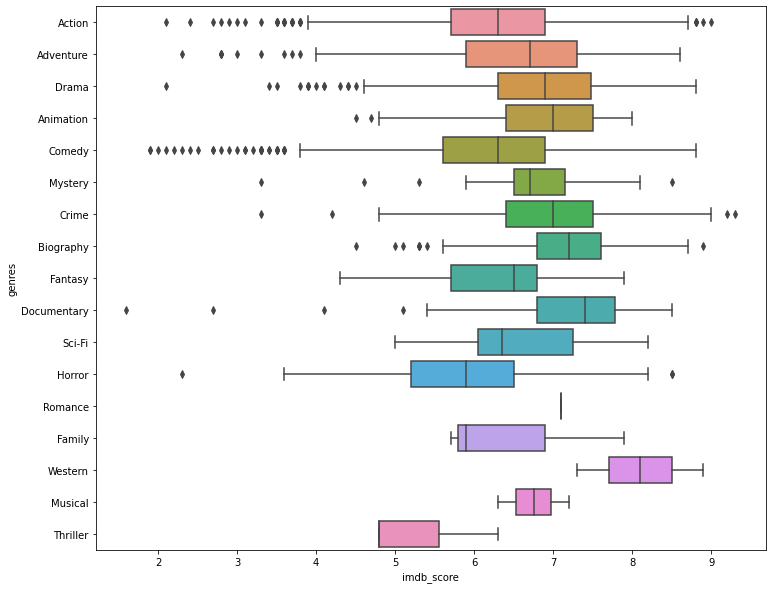

In [44]:
plt.figure(figsize=(12,10))
sns.boxplot(x='imdb_score',y='genres',data=df)

In [45]:
df.columns

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'plot_keywords', 'num_user_for_reviews', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'movie_facebook_likes', 'Profit'],
      dtype='object')

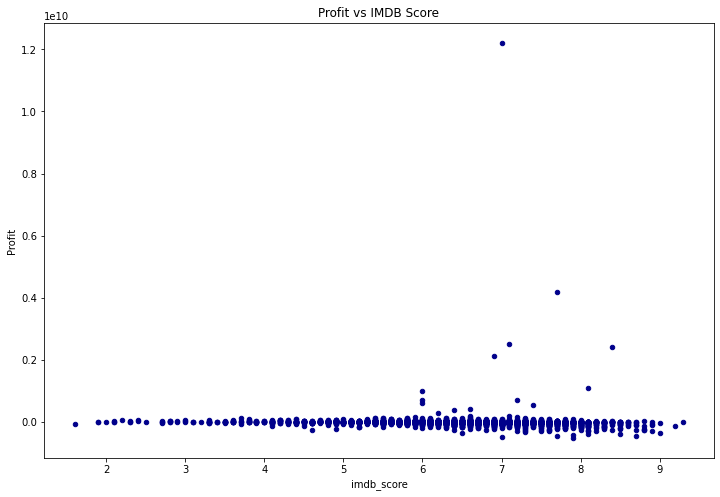

In [46]:
df.plot(kind='scatter', x='imdb_score', y='Profit', figsize=(12, 8), color='darkblue')

plt.title('Profit vs IMDB Score')
plt.xlabel('imdb_score')
plt.ylabel('Profit')

plt.show()

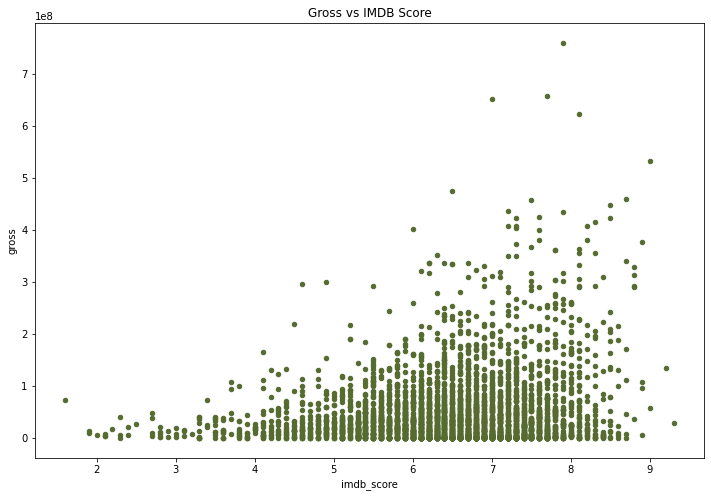

In [47]:
df.plot(kind='scatter', x='imdb_score', y='gross', figsize=(12, 8), color='darkolivegreen')

plt.title('Gross vs IMDB Score')
plt.xlabel('imdb_score')
plt.ylabel('gross')

plt.show()

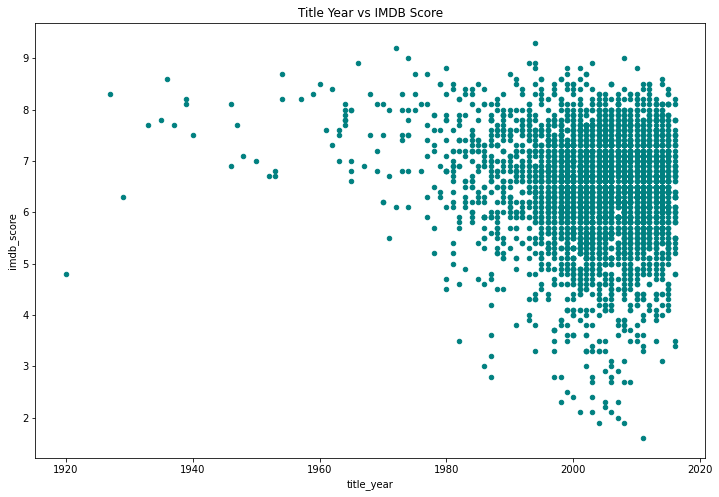

In [48]:
df.plot(kind='scatter', x='title_year', y='imdb_score', figsize=(12, 8), color='teal')

plt.title('Title Year vs IMDB Score')
plt.xlabel('title_year')
plt.ylabel('imdb_score')

plt.show()

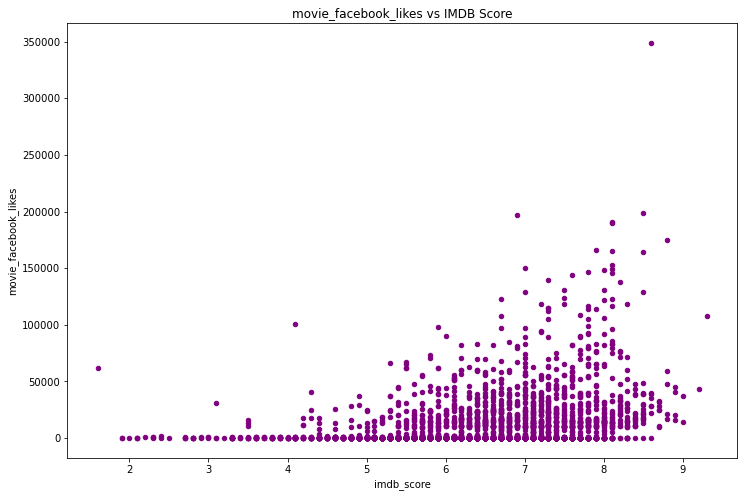

In [49]:
df.plot(kind='scatter', x='imdb_score', y='movie_facebook_likes', figsize=(12, 8), color='purple')

plt.title('movie_facebook_likes vs IMDB Score')
plt.xlabel('imdb_score')
plt.ylabel('movie_facebook_likes')

plt.show()

In [50]:
df

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,plot_keywords,num_user_for_reviews,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,movie_facebook_likes,Profit
0,1,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action,...,avatar,3054.0,USA,PG-13,237000000.0,2009.0,936.0,7.9,33000,-523505847.0
1,1,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action,...,goddess,1238.0,USA,PG-13,300000000.0,2007.0,5000.0,7.1,0,-9404152.0
2,1,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action,...,bomb,994.0,UK,PG-13,245000000.0,2015.0,393.0,6.8,85000,44925825.0
3,1,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action,...,deception,2701.0,USA,PG-13,250000000.0,2012.0,23000.0,8.5,164000,-198130642.0
5,1,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action,...,alien,738.0,USA,PG-13,263700000.0,2012.0,632.0,6.6,24000,190641321.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5033,1,Shane Carruth,143.0,77.0,291.0,8.0,David Sullivan,291.0,424760.0,Drama,...,changing the future,371.0,USA,PG-13,7000.0,2004.0,45.0,7.0,19000,-417760.0
5034,1,Neill Dela Llana,35.0,80.0,0.0,0.0,Edgar Tancangco,0.0,70071.0,Thriller,...,jihad,35.0,Philippines,Not Rated,7000.0,2005.0,0.0,6.3,74,-63071.0
5035,1,Robert Rodriguez,56.0,81.0,0.0,6.0,Peter Marquardt,121.0,2040920.0,Action,...,assassin,130.0,USA,R,7000.0,1992.0,20.0,6.9,0,-2033920.0
5037,1,Edward Burns,14.0,95.0,0.0,133.0,Caitlin FitzGerald,296.0,4584.0,Comedy,...,written and directed by cast member,14.0,USA,Not Rated,9000.0,2011.0,205.0,6.4,413,4416.0


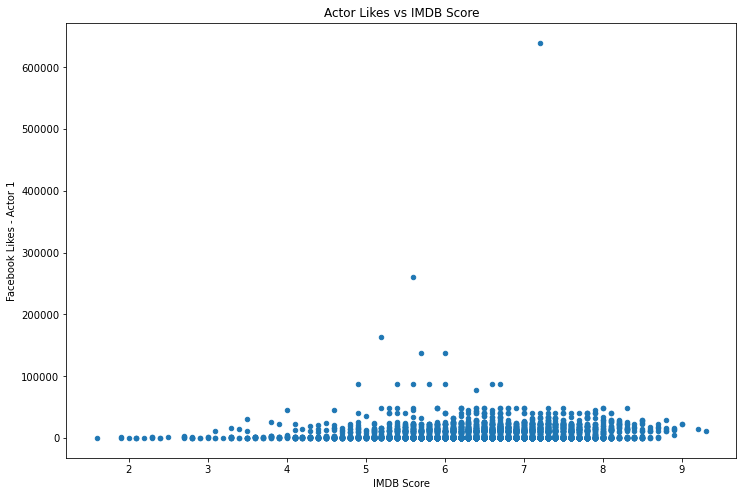

In [51]:
df.plot(kind='scatter', x='imdb_score',y='actor_1_facebook_likes', figsize=(12, 8)) 
plt.title('Actor Likes vs IMDB Score')
plt.xlabel('IMDB Score')
plt.ylabel('Facebook Likes - Actor 1')

plt.show()

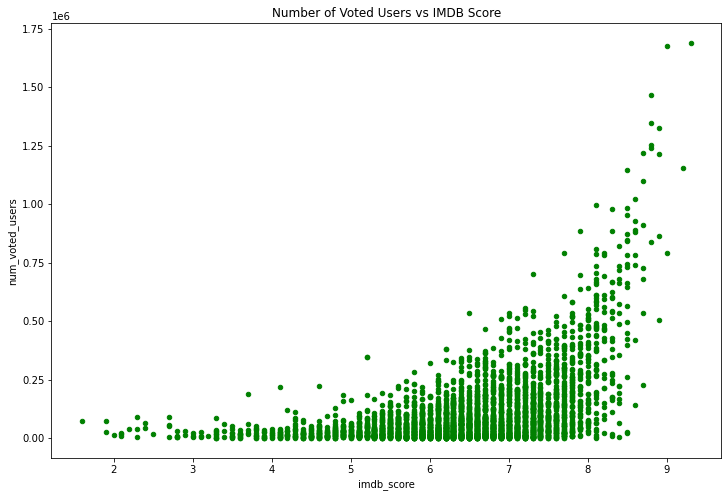

In [52]:
df.plot(kind='scatter', x='imdb_score', y='num_voted_users', figsize=(12, 8), color='green')

plt.title('Number of Voted Users vs IMDB Score')
plt.ylabel('num_voted_users')
plt.xlabel('imdb_score')

plt.show()

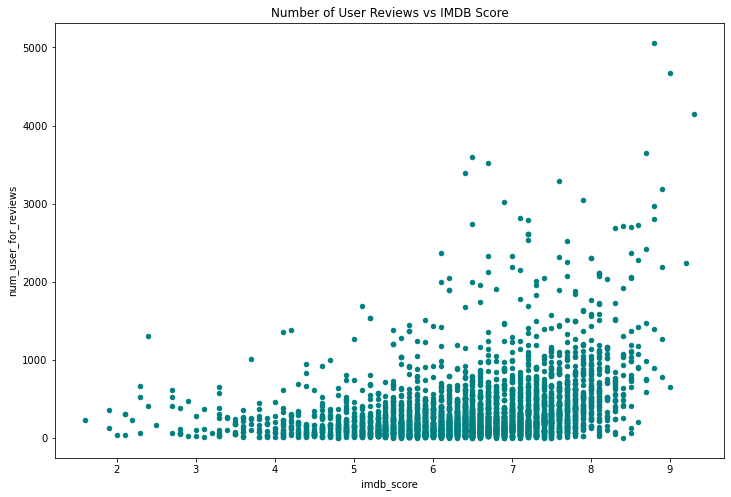

In [53]:
df.plot(kind='scatter', x='imdb_score', y='num_user_for_reviews', figsize=(12, 8), color='teal')

plt.title('Number of User Reviews vs IMDB Score')
plt.ylabel('num_user_for_reviews')
plt.xlabel('imdb_score')

plt.show()

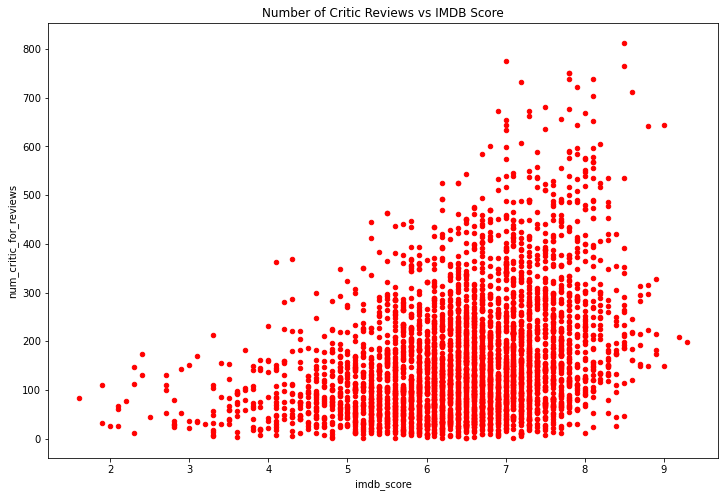

In [54]:
df.plot(kind='scatter', x='imdb_score', y='num_critic_for_reviews', figsize=(12, 8), color='red')

plt.title('Number of Critic Reviews vs IMDB Score')
plt.ylabel('num_critic_for_reviews')
plt.xlabel('imdb_score')

plt.show()

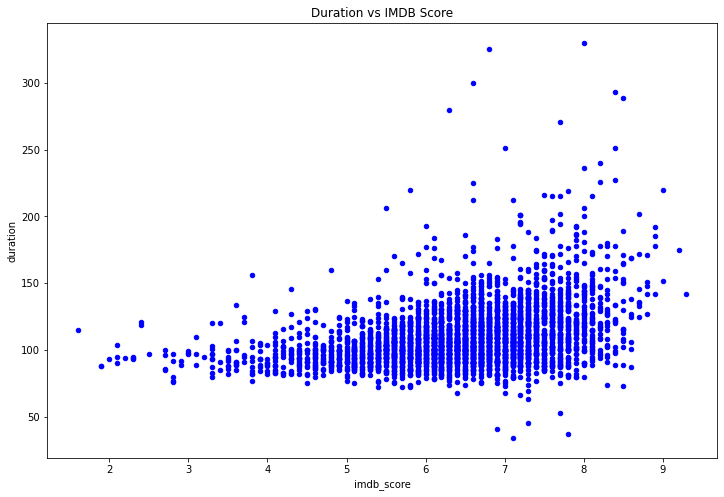

In [105]:
df.plot(kind='scatter', x='imdb_score', y='duration', figsize=(12, 8), color='blue')

plt.title('Duration vs IMDB Score')
plt.ylabel('duration')
plt.xlabel('imdb_score')

plt.show()

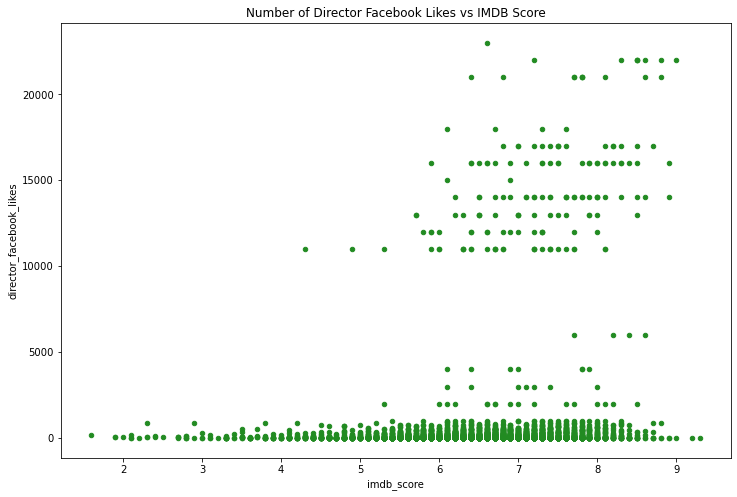

In [56]:
df.plot(kind='scatter', x='imdb_score', y='director_facebook_likes', figsize=(12, 8), color='forestgreen')

plt.title('Number of Director Facebook Likes vs IMDB Score')
plt.ylabel('director_facebook_likes')
plt.xlabel('imdb_score')

plt.show()

In [57]:
df.columns

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'plot_keywords', 'num_user_for_reviews', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'movie_facebook_likes', 'Profit'],
      dtype='object')

Text(0.5, 1.0, 'Movie Genre Frequency')

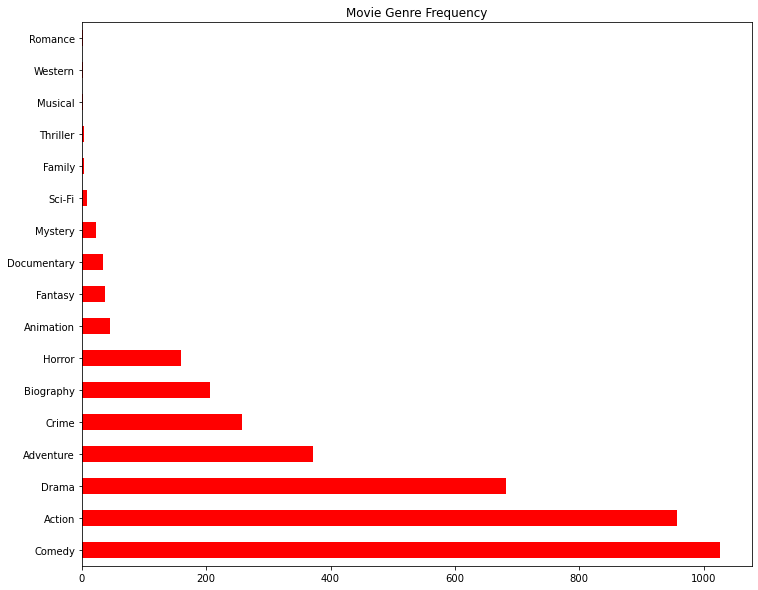

In [58]:
#create new dataframe containing value count for each genre
#plot bar graph showing frequency of each genre

df_genres = df.genres.value_counts()

df_genres.plot(kind='barh', figsize=(12,10), color='red')

plt.title('Movie Genre Frequency')

Text(0.5, 0, 'Gross')

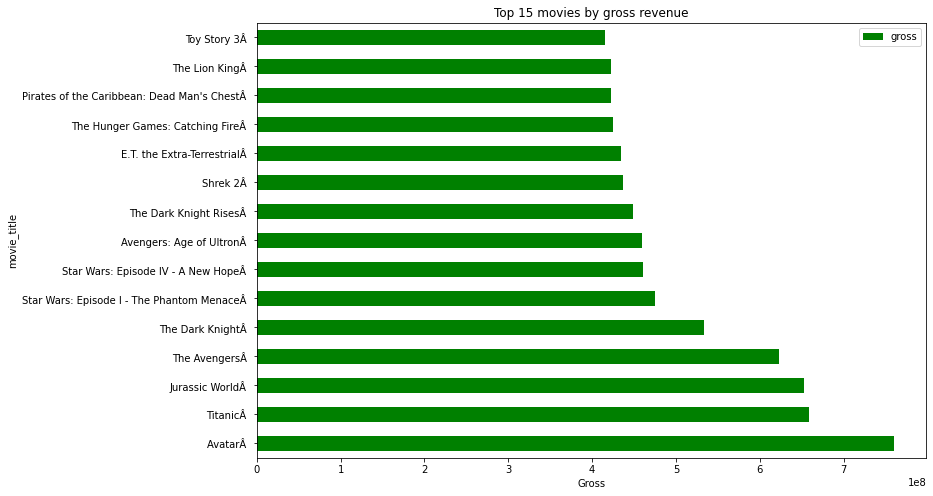

In [59]:
# Plot the top 15 movies based on gross revenue
#create new dataframe containing top 15 movies in order of gross revenue

df_gross = df.sort_values(by='gross', ascending=False)
df_gross = df_gross.head(15)

df_gross.plot(kind='barh', x='movie_title', y='gross', figsize=(12,8), color='green')

plt.title('Top 15 movies by gross revenue')
plt.xlabel('Gross')

Text(0.5, 0, 'Profit')

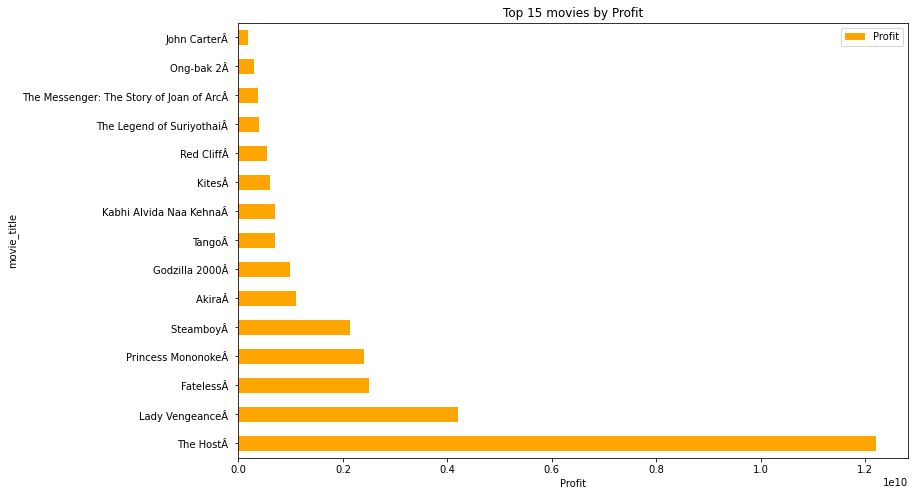

In [60]:
# Plot the top 15 movies based on profit (Gross-Budget)

df_profit = df.sort_values(by='Profit', ascending=False)
df_profit = df_profit.head(15)

df_profit.plot(kind='barh', x='movie_title', y='Profit', figsize=(12,8), color='orange')

plt.title('Top 15 movies by Profit')
plt.xlabel('Profit')

Text(0.5, 0, 'Gross')

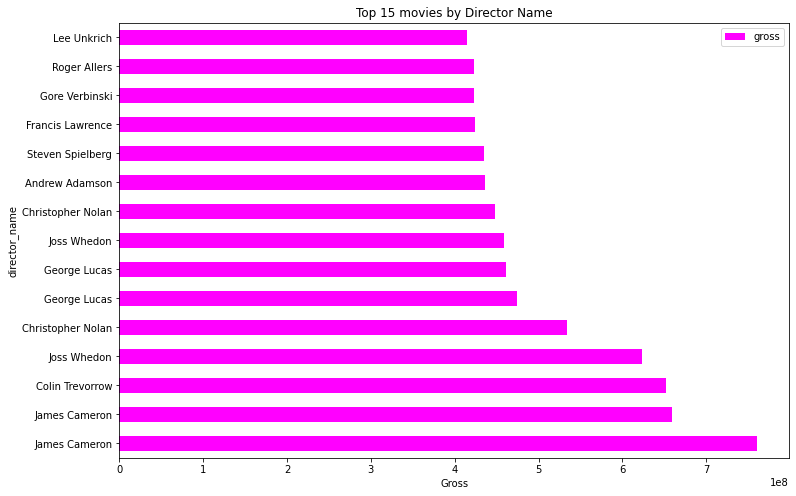

In [61]:
#Top 15 movies by Gross Revenue and Director Name

df_director = df.sort_values(by='gross', ascending=False)
df_director = df_director.head(15)

df_director.plot(kind='barh',x='director_name', y='gross', figsize=(12,8), color='magenta')

plt.title('Top 15 movies by Director Name')
plt.xlabel('Gross')

Text(0.5, 0, 'IMDB Score')

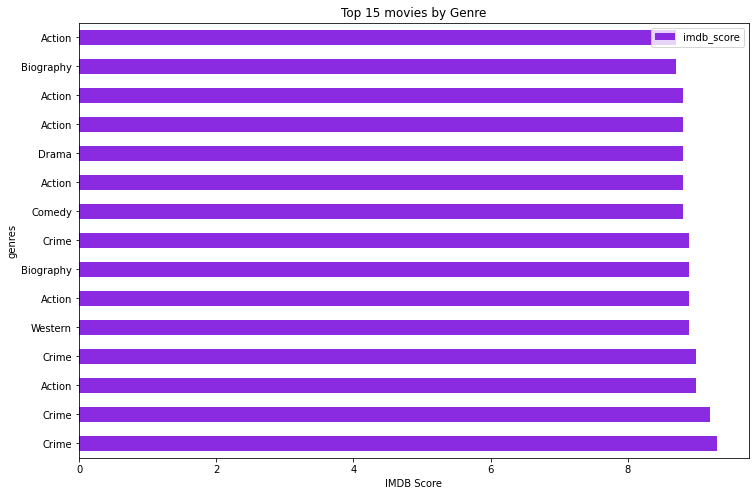

In [62]:
#Top 15 movies by Genre (imdb rating)

df_topGenres = df.sort_values(by='imdb_score', ascending=False)
df_topGenres = df_topGenres.head(15)

df_topGenres.plot(kind='barh',x='genres', y='imdb_score', figsize=(12,8), color='blueviolet')

plt.title('Top 15 movies by Genre')
plt.xlabel('IMDB Score')

Text(0.5, 0, 'IMDB Score')

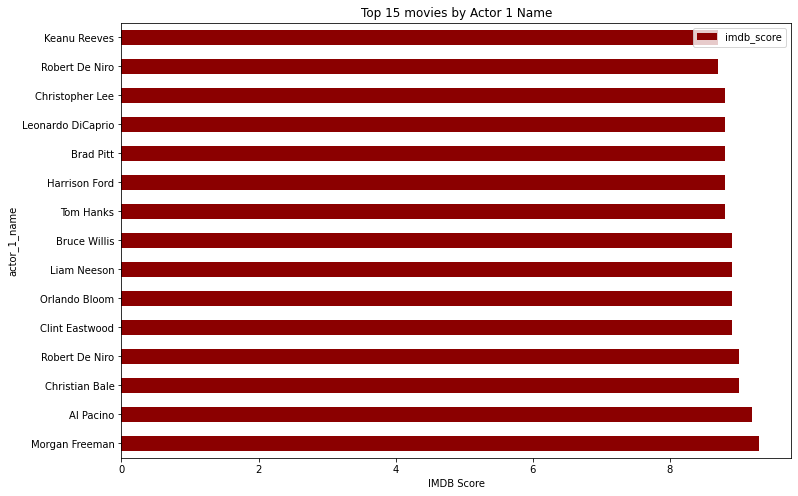

In [63]:
df_topGenres.plot(kind='barh',x='actor_1_name', y='imdb_score', figsize=(12,8), color='darkred')

plt.title('Top 15 movies by Actor 1 Name')
plt.xlabel('IMDB Score')

Text(0.5, 0, 'IMDB Score')

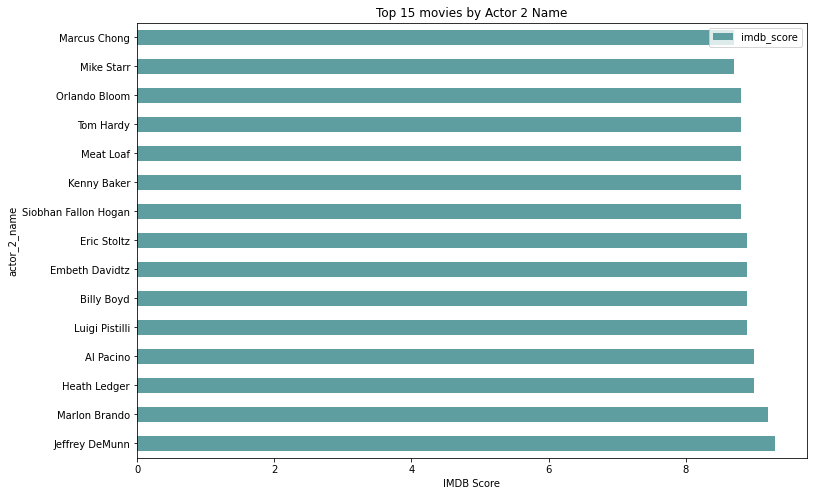

In [64]:
df_topGenres.plot(kind='barh',x='actor_2_name', y='imdb_score', figsize=(12,8), color='cadetblue')

plt.title('Top 15 movies by Actor 2 Name')
plt.xlabel('IMDB Score')

Text(0.5, 0, 'IMDB Score')

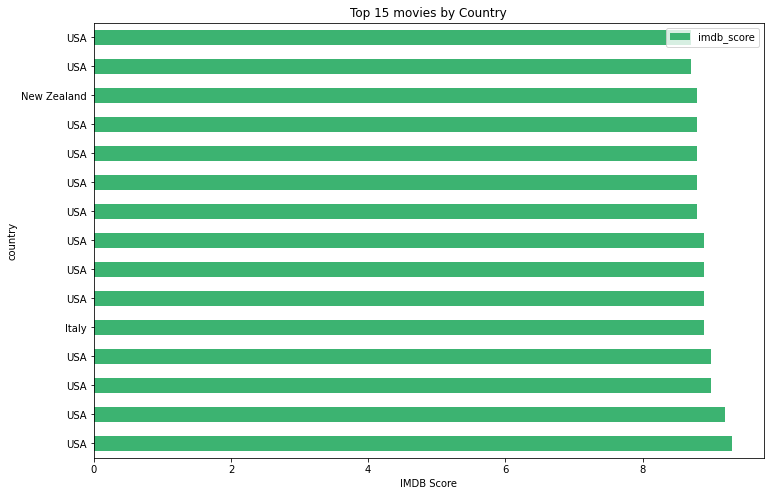

In [65]:
#Top 15 movies by country

df_topGenres.plot(kind='barh',x='country', y='imdb_score', figsize=(12,8), color='mediumseagreen')

plt.title('Top 15 movies by Country')
plt.xlabel('IMDB Score')

## Data Preparation - Removing Categorical and String variables

In [66]:
#Remove Actor Names from Dataframe

df.drop('actor_1_name', axis=1, inplace=True)
df.drop('actor_2_name', axis=1, inplace=True)
df.drop('actor_3_name', axis=1, inplace=True)

In [67]:
#Remove director name

df.drop('director_name',axis=1,inplace=True)

In [68]:
#remove Movie title

df.drop('movie_title',axis=1,inplace=True)

In [69]:
#remove plot keywords

df.drop('plot_keywords',axis=1,inplace=True)

In [70]:
#remove genres 

df.drop('genres',axis=1,inplace=True)

In [71]:
df.drop('Profit',axis=1,inplace=True)

In [72]:
#Remove country variable

df.drop('country',axis=1,inplace=True)

In [73]:
#Remove content_rating variable

df.drop('content_rating',axis=1,inplace=True)

In [74]:
#Remove color variable

df.drop('color',axis=1,inplace=True)

In [75]:
df.columns

Index(['num_critic_for_reviews', 'duration', 'director_facebook_likes',
       'actor_3_facebook_likes', 'actor_1_facebook_likes', 'gross',
       'num_voted_users', 'cast_total_facebook_likes', 'num_user_for_reviews',
       'budget', 'title_year', 'actor_2_facebook_likes', 'imdb_score',
       'movie_facebook_likes'],
      dtype='object')

In [76]:
df.corr()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,movie_facebook_likes
num_critic_for_reviews,1.000000,0.234069,0.178464,0.248477,0.169102,0.470769,0.597697,0.237934,0.569631,0.105832,0.406310,0.254764,0.344290,0.703185
duration,0.234069,1.000000,0.179935,0.121944,0.084459,0.247208,0.341757,0.119547,0.354740,0.068345,-0.128631,0.128103,0.361081,0.218297
director_facebook_likes,0.178464,0.179935,1.000000,0.122088,0.091565,0.142271,0.304095,0.121491,0.221068,0.018791,-0.045923,0.119403,0.190884,0.162602
actor_3_facebook_likes,0.248477,0.121944,0.122088,1.000000,0.253215,0.283634,0.260144,0.485544,0.203691,0.039084,0.113898,0.550756,0.063089,0.259836
actor_1_facebook_likes,0.169102,0.084459,0.091565,0.253215,1.000000,0.145285,0.180107,0.946402,0.124542,0.016583,0.094064,0.390526,0.091009,0.128960
gross,0.470769,0.247208,0.142271,0.283634,0.145285,1.000000,0.627622,0.230846,0.551339,0.100179,0.051243,0.246146,0.212689,0.366256
num_voted_users,0.597697,0.341757,0.304095,0.260144,0.180107,0.627622,1.000000,0.246440,0.781789,0.067408,0.021402,0.241633,0.475909,0.519199
cast_total_facebook_likes,0.237934,0.119547,0.121491,0.485544,0.946402,0.230846,0.246440,1.000000,0.180155,0.028428,0.123859,0.639843,0.103372,0.199915
num_user_for_reviews,0.569631,0.354740,0.221068,0.203691,0.124542,0.551339,0.781789,0.180155,1.000000,0.072250,0.017798,0.188463,0.321453,0.373858
budget,0.105832,0.068345,0.018791,0.039084,0.016583,0.100179,0.067408,0.028428,0.072250,1.000000,0.045689,0.035406,0.029153,0.052791


Text(0.5, 1.0, 'Correlation Heatmap')

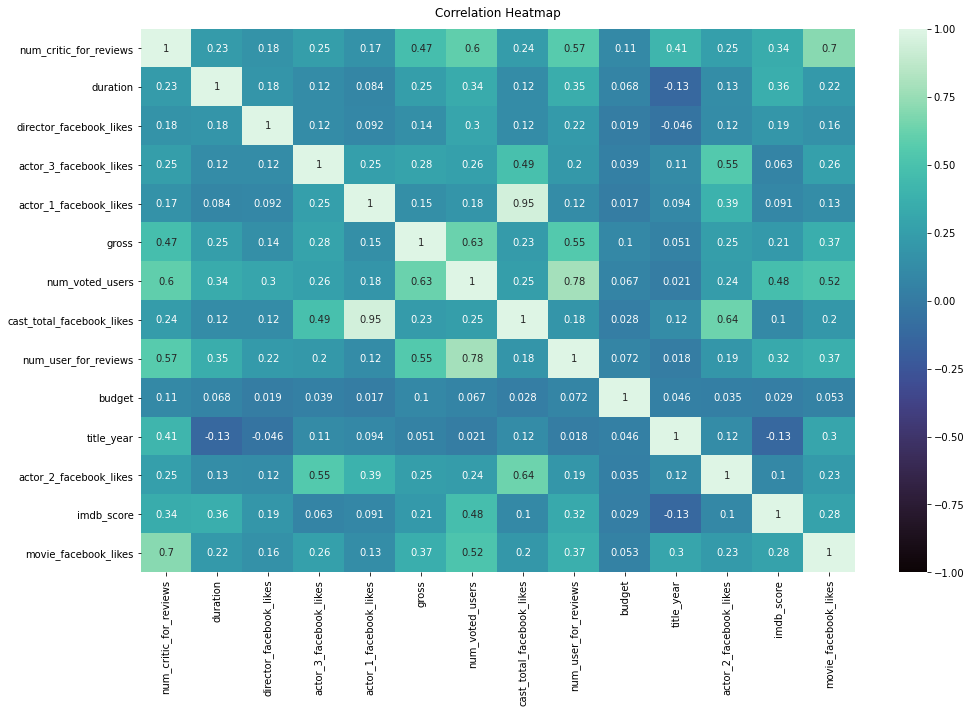

In [77]:
plt.figure(figsize=(16, 10))

heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, cmap="mako")

heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)

Based on the heatmap above, we can see that there are several variables that have more of a correlation to IMDB Score
Namely:
- Num_critic_for_reviews
- Duration
- Num_voted_users
- Num_user_for_reviews
- Gross
- Movie_facebook_likes
- director_facebook_likes

The ones that do not have a strong correlation are:
- Actor 3 Facebook likes
- ACtor 1 facebook likes
- Actor 2 Facebook Likes
- budget
- title_year
- cast_total_facebook_likes

# Data Modelling

In [78]:
df.columns

Index(['num_critic_for_reviews', 'duration', 'director_facebook_likes',
       'actor_3_facebook_likes', 'actor_1_facebook_likes', 'gross',
       'num_voted_users', 'cast_total_facebook_likes', 'num_user_for_reviews',
       'budget', 'title_year', 'actor_2_facebook_likes', 'imdb_score',
       'movie_facebook_likes'],
      dtype='object')

Split Data into Training and Test Data

In [79]:
X = pd.DataFrame(columns=['num_critic_for_reviews', 'duration', 'director_facebook_likes',
       'actor_3_facebook_likes', 'actor_1_facebook_likes', 'gross',
       'num_voted_users', 'cast_total_facebook_likes', 'num_user_for_reviews',
       'budget', 'title_year', 'actor_2_facebook_likes',
       'movie_facebook_likes'], data=df)

y = pd.DataFrame(columns=['imdb_score'], data=df)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [80]:
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (2671, 13) (2671, 1)
Test set: (1146, 13) (1146, 1)


Feature Scaling:

In [81]:
from sklearn.preprocessing import MinMaxScaler

scale_X = MinMaxScaler()
X_train = pd.DataFrame(scale_X.fit_transform(X_train))
X_test = pd.DataFrame(scale_X.transform(X_test))

Linear Regression Model

In [82]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

lm = LinearRegression()
lm.fit(X_train.values, y_train.values)

LinearRegression()

In [83]:
pred_lm=lm.predict(X_test.values)

In [84]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

print('The mean squared error using Linear regression is: ',mean_squared_error(y_test,pred_lm))
print('The mean absolute error using Linear regression is: ',mean_absolute_error(y_test,pred_lm))

The mean squared error using Linear regression is:  0.7172243780417449
The mean absolute error using Linear regression is:  0.6597563250339964


In [85]:
lm.coef_

array([[  2.24262497,   2.723619  ,   0.10104218,   1.66119334,
         53.03407494,  -1.25337503,   6.40328157, -53.76661776,
         -3.23313758,  -0.68593189,  -2.19027684,   2.61041427,
         -0.45237005]])

XGBoost Model

In [86]:
import xgboost as xgb

xg_model = xgb.XGBRegressor(n_estimators = 200)

xg_model.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=200, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [87]:
xg_pred = xg_model.predict(X_test)

In [88]:
print('The mean squared error using XGBoost: ',mean_squared_error(y_test,xg_pred))
print('The mean absolute error using XGBoost: ',mean_absolute_error(y_test,xg_pred))

The mean squared error using XGBoost:  0.5001515743703622
The mean absolute error using XGBoost:  0.5121951537606603


As We can see, the XGBoost has a significantly lower Mean Squared Error. Thus making the model a better fit.

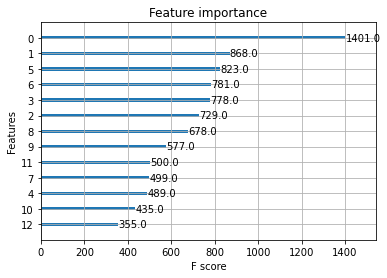

In [100]:
from xgboost import plot_importance

plot_importance(xg_model)
plt.show()

In [90]:
xg_model.feature_importances_

array([0.03965041, 0.09017092, 0.0308682 , 0.03990011, 0.03517756,
       0.05659872, 0.29902926, 0.03563207, 0.07860937, 0.11668146,
       0.08714436, 0.03959745, 0.05094019], dtype=float32)

In [104]:
X

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,movie_facebook_likes
0,723.0,178.0,0.0,855.0,1000.0,760505847.0,886204,4834,3054.0,237000000.0,2009.0,936.0,33000
1,302.0,169.0,563.0,1000.0,40000.0,309404152.0,471220,48350,1238.0,300000000.0,2007.0,5000.0,0
2,602.0,148.0,0.0,161.0,11000.0,200074175.0,275868,11700,994.0,245000000.0,2015.0,393.0,85000
3,813.0,164.0,22000.0,23000.0,27000.0,448130642.0,1144337,106759,2701.0,250000000.0,2012.0,23000.0,164000
5,462.0,132.0,475.0,530.0,640.0,73058679.0,212204,1873,738.0,263700000.0,2012.0,632.0,24000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5033,143.0,77.0,291.0,8.0,291.0,424760.0,72639,368,371.0,7000.0,2004.0,45.0,19000
5034,35.0,80.0,0.0,0.0,0.0,70071.0,589,0,35.0,7000.0,2005.0,0.0,74
5035,56.0,81.0,0.0,6.0,121.0,2040920.0,52055,147,130.0,7000.0,1992.0,20.0,0
5037,14.0,95.0,0.0,133.0,296.0,4584.0,1338,690,14.0,9000.0,2011.0,205.0,413


We can See that in order of importance, each feature has been plotted.
In order of importance:
- Num_critic_for_reviews
- duration
- gross
- num_voted_users
- actor_3_facebook_likes
- director_facebook_likes
- num_user_for_reviews
- budget
- actor_2_facebook_likes
- cast_total_facebook_likes
- actor_1_facebook_likes
- title_year
- movie_facebook_likes

In [101]:
X_train.columns

RangeIndex(start=0, stop=13, step=1)